In [7]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
#\u03B1
#w, theta, l_0, f_t, s, l, f, m, u, c = sp.symbols('w \u03B8 l_0 f_t, s l f m u c', positive=True, real=True)

w, theta, l_0, u, s, c, l, m  = sp.symbols('w \u03B8 l_0 u s c l m', positive=True, real=True)

l_x = np.linspace(0.01, 60, 1000)
theta_num = 0.5
m_num = 100
l_0_num = 60
s_num = 100 #subsidie
l_num = 40 #arbeid 40 timer i uka
f_num = 20 #fritid. 20 timer i uka


nytte = sp.Eq(u, c**theta * l**(1-theta))
nytte


konsum_func = sp.solve(nytte, c)[0]


#l_func = sp.solve(nytte, l)[0]

#c_func, l_func

konsum_func = sp.lambdify((u, theta, l), konsum_func)



nytte_tilfelle_1 = (m)**theta * l_0**(1-theta)           
nytte_tilfelle_2 = (m + s)**theta * l_0**(1-theta) 

eq_tilfelle1 = sp.Eq((m + w*l)**theta * (l_0-l)**(1-theta), nytte_tilfelle_1)
eq_tilfelle2 = sp.Eq((m + w*l)**theta * (l_0-l)**(1-theta), nytte_tilfelle_2)

lonn_tilfelle_1 = sp.solve(eq_tilfelle1, w)[0]
lonn_tilfelle_1_num = lonn_tilfelle_1.subs([(theta, theta_num), (l_0, l_0_num), (l, l_num), (m, m_num)])


lonn_tilfelle_2 = sp.solve(eq_tilfelle2, w)[0]
lonn_tilfelle_2_num = lonn_tilfelle_2.subs([(theta, theta_num), (l_0, l_0_num), (l, l_num), (m, m_num), (s, s_num)])




nytte_tilfelle_1_num = nytte_tilfelle_1.subs([(theta, theta_num), (l_0, l_0_num), (m, m_num)])
nytte_tilfelle_2_num = nytte_tilfelle_2.subs([(theta, theta_num), (l_0, l_0_num), (m, m_num) ,(s, s_num)])


indiff_tilfelle1 = konsum_func(nytte_tilfelle_1_num, theta_num, l_x)
indiff_tilfelle2 = konsum_func(nytte_tilfelle_2_num, theta_num, l_x)



konsum_tilfelle1 = m_num + lonn_tilfelle_1_num*(l_0_num - l_x)
konsum_tilfelle2 = m_num + lonn_tilfelle_2_num*(l_0_num - l_x)




#Ved å runne koden under som er kommentert ut så vil du få svarene 5 og 12.5.
#lonn_tilfelle_1_num, lonn_tilfelle_2_num


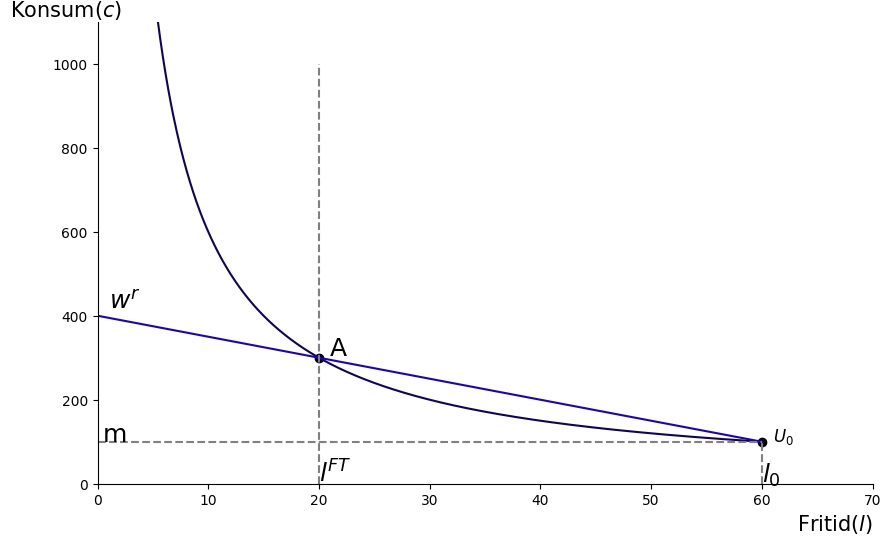

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(l_x, indiff_tilfelle1, color="#0F045B")




ax.plot(l_x, konsum_tilfelle1, color = "#1B01C0")


ax.text(1, 415, '$w^r$', fontsize=18)



ax.vlines(20, 0, 1000, linestyles='dashed', color="grey")
ax.text(20, +3, '$l^{FT}$', fontsize=18)


ax.vlines(60, 0, 100, linestyles='dashed', color="grey")
ax.text(60, +3, '$l_0$', fontsize=18)


#hlines at 100
ax.hlines(m_num, 0, l_0_num, linestyles='dashed', color="grey")
ax.text(.5, m_num, 'm', fontsize=18)
#Arbeidsfri inntekt => m=100

#Arbeidsfri inntekt + stønad => m+s=200


#scatter
ax.scatter(l_0_num, m_num, color="black")

ax.text(l_0_num+1, m_num+1, '$U_0$', fontsize=12)




#axis labels
ax.set_xlabel('Fritid($l$)', loc="right", fontsize=15)

#ylabel position. moving it a little right
ax.set_ylabel('Konsum($c$)', rotation=0, loc="top", fontsize=15, labelpad=-50)




#VI kan se at dersom Tone kunne jobbet deltid så hadde hun fått høyere nytte enn når hun er tvunget til fulltid.
#ax.plot(l_x, konsum_tilfelle1+100, label='test')
ax.set_xlim(0, 70)
ax.set_ylim(0, 1100)





ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.scatter(20, (m_num + lonn_tilfelle_1_num*(40)), color="black")
ax.text(21, (m_num + lonn_tilfelle_1_num*(40))+5, 'A', fontsize=18)


#pltsavefig
plt.savefig('nytte_1.png', dpi=300, bbox_inches='tight')


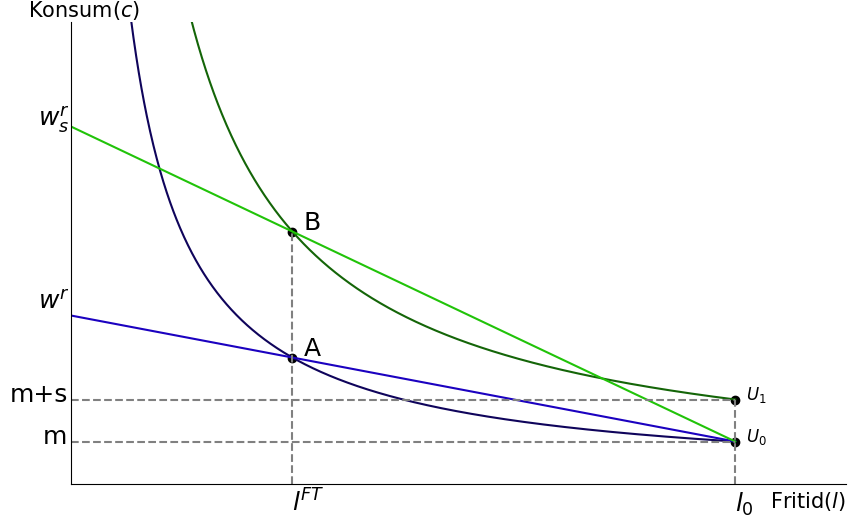

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(l_x, indiff_tilfelle1, color="#0F045B")
ax.plot(l_x, indiff_tilfelle2, color="#146508")



ax.plot(l_x, konsum_tilfelle1, color = "#1B01C0")
ax.plot(l_x, konsum_tilfelle2, color = "#21C309")

ax.text(-3, 415, '$w^r$', fontsize=18)

ax.text(-3, 850, '$w_s^r$', fontsize=18)

ax.vlines(20, 0, (m_num + lonn_tilfelle_2_num*(40)), linestyles='dashed', color="grey")
ax.text(20, -65, '$l^{FT}$', fontsize=18)


ax.vlines(60, 0, 200, linestyles='dashed', color="grey")
ax.text(60, -65, '$l_0$', fontsize=18)


#hlines at 100
ax.hlines(m_num, 0, l_0_num, linestyles='dashed', color="grey")
ax.text(-2.5, m_num-5, 'm', fontsize=18)
#Arbeidsfri inntekt => m=100

ax.hlines(m_num+s_num, 0, l_0_num, linestyles='dashed', color="grey")
ax.text(-5.5, m_num+s_num-5, 'm+s', fontsize=18)
#Arbeidsfri inntekt + stønad => m+s=200


#scatter
ax.scatter(l_0_num, m_num, color="black")
ax.scatter(l_0_num, m_num+s_num, color="black")
ax.text(l_0_num+1, m_num+1, '$U_0$', fontsize=12)
ax.text(l_0_num+1, m_num+s_num+1, '$U_1$', fontsize=12)



#axis labels
ax.set_xlabel('Fritid($l$)', loc="right", fontsize=15)

#ylabel position. moving it a little right
ax.set_ylabel('Konsum($c$)', rotation=0, loc="top", fontsize=15, labelpad=-50)




#VI kan se at dersom Tone kunne jobbet deltid så hadde hun fått høyere nytte enn når hun er tvunget til fulltid.
#ax.plot(l_x, konsum_tilfelle1+100, label='test')
ax.set_xlim(0, 70)
ax.set_ylim(0, 1100)




ax.set_xticks([])
ax.set_yticks([])


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.scatter(20, (m_num + lonn_tilfelle_1_num*(40)), color="black")
ax.text(21, (m_num + lonn_tilfelle_1_num*(40))+5, 'A', fontsize=18)


ax.scatter(20, (m_num + lonn_tilfelle_2_num*(40)), color="black")
ax.text(21, (m_num + lonn_tilfelle_2_num*(40))+5, 'B', fontsize=18)



#pltsavefig
plt.savefig('nytte_2.png', dpi=300, bbox_inches='tight')


In [421]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

w, alpha, l_0, u, s, c, l, m, lam, beta  = sp.symbols('w \u03B1 l_0 u s c l m lamda beta', positive=True, real=True)

l_x = np.linspace(0.01, 60, 1000)
alpha_num = 2/7

m_num = 100
l_0_num = 60
s_num = 100 #subsidie
l_num = 40 #arbeid 40 timer i uka
f_num = 20 #fritid. 20 timer i uka
w_num = 10
#alpha = 2/7
beta_num = 0.6
#charlie = 0

nytte1 = sp.Eq(u, c**(1-alpha) * l**alpha)
nytte2 = sp.Eq(u, c**(1-beta) * l**beta)


bibet1 = (700 - 10*l)
bibet2 = (700 - 0*10*l)



#700-w_num*l
nytte1 = c**(1-alpha) * l**alpha + lam*(bibet1-c)
nytte1
diffc = sp.diff(nytte1, c)
diffl = sp.diff(nytte1, l)
difflam = sp.diff(nytte1, lam)

eq1 = sp.Eq(diffc, 0).subs([(alpha, alpha_num)])
eq2 = sp.Eq(diffl, 0).subs([(alpha, alpha_num), (w, w_num)])
eq3 = sp.Eq(difflam, 0)

#sol = diffc/diffl
#sol.subs([(alpha, alpha_num), (w, w_num), (m, m_num)])
#solve for c
#sp.solve(sol.subs([(alpha, alpha_num), (w, w_num), (m, m_num)]), l)
#solve diffc diffl difflam
sols = sp.solve([eq1, eq2, eq3], [c, l, lam])
#saving the c solution as variable
c_sol = sols[0][0]
#saving first solution as variable
l_sol = sols[0][1]
c_sol, l_sol


scenario1 = (c_sol)**(5/7) * (l_sol)**(2/7)
scenario2 = (c_sol)**(0.4) * (l_sol+40)**(0.6)
scenario1, scenario2
diffl


c**(1 - α)*l**α*α/l - 10*lamda

In [430]:
nytte2 = c**(1-beta) * l**beta + lam*(bibet2-c)
nytte2 = c**(1-beta) * l**beta + lam*(-c)
nytte2
diffc2 = sp.diff(nytte2, c)
diffl2 = sp.diff(nytte2, l)
difflam2 = sp.diff(nytte2, lam)

eq12 = sp.Eq(diffc2, 0).subs([(beta, beta_num)])
eq22 = sp.Eq(diffl2, 0).subs([(beta, beta_num)])
eq32 = sp.Eq(difflam2, 0)

sp.solve([eq12, eq22, eq32], [c, l, lam])
eq32


False

In [ ]:


nytte = sp.Eq(u, c**theta * l**(1-theta))
nytte


konsum_func = sp.solve(nytte, c)[0]


#l_func = sp.solve(nytte, l)[0]

#c_func, l_func

konsum_func = sp.lambdify((u, theta, l), konsum_func)



nytte_tilfelle_1 = (m)**theta * l_0**(1-theta)           
nytte_tilfelle_2 = (m + s)**theta * l_0**(1-theta) 

eq_tilfelle1 = sp.Eq((m + w*l)**theta * (l_0-l)**(1-theta), nytte_tilfelle_1)
eq_tilfelle2 = sp.Eq((m + w*l)**theta * (l_0-l)**(1-theta), nytte_tilfelle_2)

lonn_tilfelle_1 = sp.solve(eq_tilfelle1, w)[0]
lonn_tilfelle_1_num = lonn_tilfelle_1.subs([(theta, theta_num), (l_0, l_0_num), (l, l_num), (m, m_num)])


lonn_tilfelle_2 = sp.solve(eq_tilfelle2, w)[0]
lonn_tilfelle_2_num = lonn_tilfelle_2.subs([(theta, theta_num), (l_0, l_0_num), (l, l_num), (m, m_num), (s, s_num)])




nytte_tilfelle_1_num = nytte_tilfelle_1.subs([(theta, theta_num), (l_0, l_0_num), (m, m_num)])
nytte_tilfelle_2_num = nytte_tilfelle_2.subs([(theta, theta_num), (l_0, l_0_num), (m, m_num) ,(s, s_num)])


indiff_tilfelle1 = konsum_func(nytte_tilfelle_1_num, theta_num, l_x)
indiff_tilfelle2 = konsum_func(nytte_tilfelle_2_num, theta_num, l_x)



konsum_tilfelle1 = m_num + lonn_tilfelle_1_num*(l_0_num - l_x)
konsum_tilfelle2 = m_num + lonn_tilfelle_2_num*(l_0_num - l_x)




#Ved å runne koden under som er kommentert ut så vil du få svarene 5 og 12.5.
#lonn_tilfelle_1_num, lonn_tilfelle_2_num




fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(l_x, indiff_tilfelle1, color="#0F045B")
ax.plot(l_x, indiff_tilfelle2, color="#146508")



ax.plot(l_x, konsum_tilfelle1, color = "#1B01C0")
ax.plot(l_x, konsum_tilfelle2, color = "#21C309")

ax.text(-3, 415, '$w^r$', fontsize=18)

ax.text(-3, 850, '$w_s^r$', fontsize=18)

ax.vlines(20, 0, (m_num + lonn_tilfelle_2_num*(40)), linestyles='dashed', color="grey")
ax.text(20, -65, '$l^{FT}$', fontsize=18)


ax.vlines(60, 0, 200, linestyles='dashed', color="grey")
ax.text(60, -65, '$l_0$', fontsize=18)


#hlines at 100
ax.hlines(m_num, 0, l_0_num, linestyles='dashed', color="grey")
ax.text(-2.5, m_num-5, 'm', fontsize=18)
#Arbeidsfri inntekt => m=100

ax.hlines(m_num+s_num, 0, l_0_num, linestyles='dashed', color="grey")
ax.text(-5.5, m_num+s_num-5, 'm+s', fontsize=18)
#Arbeidsfri inntekt + stønad => m+s=200


#scatter
ax.scatter(l_0_num, m_num, color="black")
ax.scatter(l_0_num, m_num+s_num, color="black")
ax.text(l_0_num+1, m_num+1, '$U_0$', fontsize=12)
ax.text(l_0_num+1, m_num+s_num+1, '$U_1$', fontsize=12)



#axis labels
ax.set_xlabel('Fritid($l$)', loc="right", fontsize=15)

#ylabel position. moving it a little right
ax.set_ylabel('Konsum($c$)', rotation=0, loc="top", fontsize=15, labelpad=-50)




#VI kan se at dersom Tone kunne jobbet deltid så hadde hun fått høyere nytte enn når hun er tvunget til fulltid.
#ax.plot(l_x, konsum_tilfelle1+100, label='test')
ax.set_xlim(0, 70)
ax.set_ylim(0, 1100)




ax.set_xticks([])
ax.set_yticks([])


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.scatter(20, (m_num + lonn_tilfelle_1_num*(40)), color="black")
ax.text(21, (m_num + lonn_tilfelle_1_num*(40))+5, 'A', fontsize=18)


ax.scatter(20, (m_num + lonn_tilfelle_2_num*(40)), color="black")
ax.text(21, (m_num + lonn_tilfelle_2_num*(40))+5, 'B', fontsize=18)



#pltsavefig
#plt.savefig('nytte_2.png', dpi=300, bbox_inches='tight')
plt.show()